
# MA plot
Author: Charles E. Vejnar (charles.vejnar@gmail.com)

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Parameters
test_name = 'WT shield vs a-Am'
col_sep = ' '
cutoff_fc = 2.
cutoff_pvalue = 0.01
outext = '.png'

In [3]:
# Open differential expression table
dds = pd.read_csv('de.csv', index_col=0)

In [4]:
# Create selectors using fold-change and P-value cutoffs
sel_pvalue = dds[test_name+col_sep+'padj'] < cutoff_pvalue
sel_fc = abs(dds[test_name+col_sep+'log2FoldChange']) > cutoff_fc

In [5]:
# Counts
sig_only = (sel_pvalue & ~sel_fc).sum()
fc_only = (sel_fc & ~sel_pvalue).sum()
sig_fc = (sel_fc & sel_pvalue).sum()

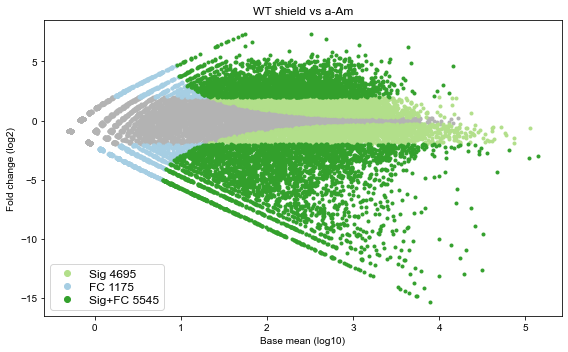

In [6]:
# Plot
fig = plt.figure(figsize=(8, 5), tight_layout=True)
ax = fig.add_subplot(1, 1, 1)
#
ax.plot(np.log10(dds.loc[~sel_fc & ~sel_pvalue, test_name+col_sep+'baseMean']), dds.loc[~sel_fc & ~sel_pvalue, test_name+col_sep+'log2FoldChange'], '.', color='#b3b3b3', rasterized=True)
p1 = ax.plot(np.log10(dds.loc[sel_pvalue & ~sel_fc, test_name+col_sep+'baseMean']), dds.loc[sel_pvalue & ~sel_fc, test_name+col_sep+'log2FoldChange'], '.', color='#b2df8a', rasterized=True)
p2 = ax.plot(np.log10(dds.loc[sel_fc & ~sel_pvalue, test_name+col_sep+'baseMean']), dds.loc[sel_fc & ~sel_pvalue, test_name+col_sep+'log2FoldChange'], '.', color='#a6cee3', rasterized=True)
p3 = ax.plot(np.log10(dds.loc[sel_fc & sel_pvalue, test_name+col_sep+'baseMean']), dds.loc[sel_fc & sel_pvalue, test_name+col_sep+'log2FoldChange'], '.', color='#33a02c', rasterized=True)
ax.set_xlabel('Base mean (log10)')
ax.set_ylabel('Fold change (log2)')
ax.set_title(test_name)
ax.legend((p1[0], p2[0], p3[0]), [f'Sig {sig_only}', f'FC {fc_only}', f'Sig+FC {sig_fc}'], numpoints=1, markerscale=2, fontsize=12, labelspacing=0.2)

In [7]:
if mpl.is_interactive() is False:
    fig.savefig(f'de_ma{outext}')